# **PENGARUH SMOTE DAN ADASYN PADA KLASIFIKASI SINDROM METABOLIK**

impot library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col
from sklearn.preprocessing import LabelEncoder

In [ ]:
from imblearn.over_sampling import SMOTE # library untuk balancing SMOTE
from imblearn.over_sampling import ADASYN  # library untuk balancing ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # library Random Forest sebagi algoritma klasifikasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # library untuk evaluasi model

# LOAD DATA

In [ ]:
url = 'https://drive.google.com/file/d/1O5_Htzqqc2C42jT0JJC9u6AgzKvuheMG/view?usp=sharing'
df = pd.read_csv(f"https://drive.google.com/uc?id={url.split('/')[-2]}")

In [ ]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [ ]:
# Mengecek julah baris dan kolom dataset
df.shape

(2401, 15)

In [ ]:
# MElihat dekripsi dataset
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [ ]:
# Mengecek nilai null
df.isnull().sum()

,0
seqn,0
Age,0
Sex,0
Marital,208
Income,117
Race,0
WaistCirc,85
BMI,26
Albuminuria,0
UrAlbCr,0


In [ ]:
# Mengecek duplikasi data
df.duplicated().sum()

np.int64(0)

In [ ]:
# Mengecek jumlah baris tiap kelas pada Metabolicsyndrome
df['MetabolicSyndrome'].value_counts()

,count
MetabolicSyndrome,
No MetSyn,1579
MetSyn,822


Mengecek distribusi dari kelas MetabolicSyndrome

MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: count, dtype: int64


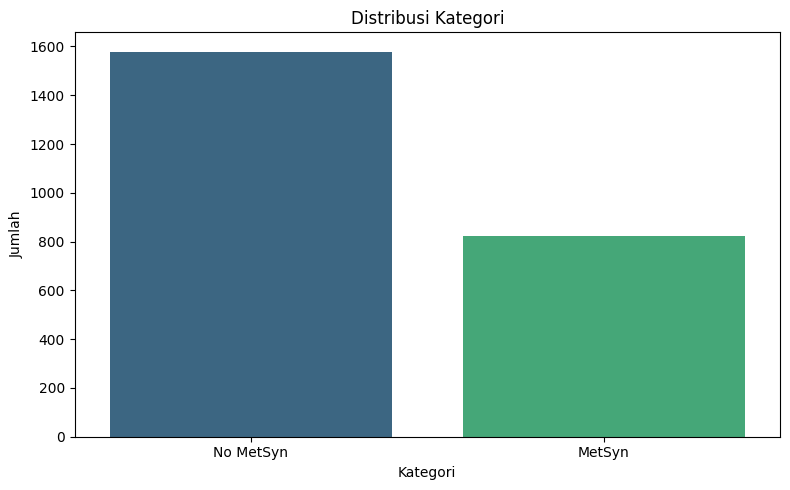

In [ ]:
plt.figure(figsize=(8,5))
kategori = df['MetabolicSyndrome'].value_counts()
sns.barplot(x=kategori.index, y=kategori.values, hue=kategori.index, palette='viridis', legend=False)

print(kategori)

plt.title('Distribusi Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()



> Berdasarkan visualisasi tersebut, terdapat imbalance class pada fitur MetabolicSyndrome(fitur target), dimana kasus terdeteksi  Sindrom Metabolik lebih sedikit dibandingkan kasus tidak terdeteksi Sindrom Metabolik, sehingga di perlukan metode balancing data



# PREPROCESSING

Menurut National Heart, Lung, and Blood Institue seseorang di diagnosa Sindrom metabolik ketika memiliki 3 atau lebih dari kriteria berikut:

| Komponen                  | Kriteria Diagnosis                     |
| ------------------------- | -------------------------------------- |
| **Tekanan darah**         | ≥130/85 mmHg                           |
| **Gula darah puasa (Fasting Glucose)**      | ≥100 mg/dL                             |
| **Kolesterol HDL (baik)** | <40 mg/dL (pria)<br><50 mg/dL (wanita) |
| **Trigliserida**          | >150 mg/dL                             |
| **Lingkar pinggang**      | >102 cm (pria)<br>>89 cm (wanita)      |

In [ ]:
# drop kolom
df = df.drop(['seqn', 'Income', 'Marital', 'Race', 'Albuminuria', 'UrAlbCr', 'UricAcid'], axis=1)

In [ ]:
# mengecek kolom setelah di drop
df.columns

Index(['Age', 'Sex', 'WaistCirc', 'BMI', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

**Missing value handling**

In [ ]:
# Penngananan missing value menggunakan mean imputaion, sehingga kolom null akan di isi oleh rata rata dari setiap kolom
df['WaistCirc'] = df['WaistCirc'].fillna(df['WaistCirc'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
WaistCirc,0
BMI,0
BloodGlucose,0
HDL,0
Triglycerides,0
MetabolicSyndrome,0


**Encoding**

Encoding diperlukan untuk mengubah kelas kategorikal menjadi numerik

In [ ]:
le = LabelEncoder()
# Melakukan encoding pada fitur MetabolicSyndrome
df['MetabolicSyndrome'] = le.fit_transform(df['MetabolicSyndrome'])

In [ ]:
# Menampilkan index dari kelas yang di encode
print(le.classes_)

['MetSyn' 'No MetSyn']


In [ ]:
# Melakukan encoding pada fitur 'Sex'
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
# Menampilkan index dari kelas yang di encode
print(le.classes_)

['Female' 'Male']


In [ ]:
# Menampilkan data setelah encoding
df

,Age,Sex,WaistCirc,BMI,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,1,81.000000,23.3,92,41,84,1
1,44,0,80.100000,23.2,82,28,56,1
2,21,1,69.600000,20.1,107,43,78,1
3,43,0,120.400000,33.3,104,73,141,1
4,51,1,81.100000,20.1,95,43,126,1
...,...,...,...,...,...,...,...,...
2396,48,0,98.307254,59.7,152,57,107,1
2397,30,0,98.307254,18.0,91,90,91,1
2398,28,1,100.800000,29.4,99,47,84,1
2399,27,1,106.600000,31.3,100,41,124,0


**Penanganan Outlier**

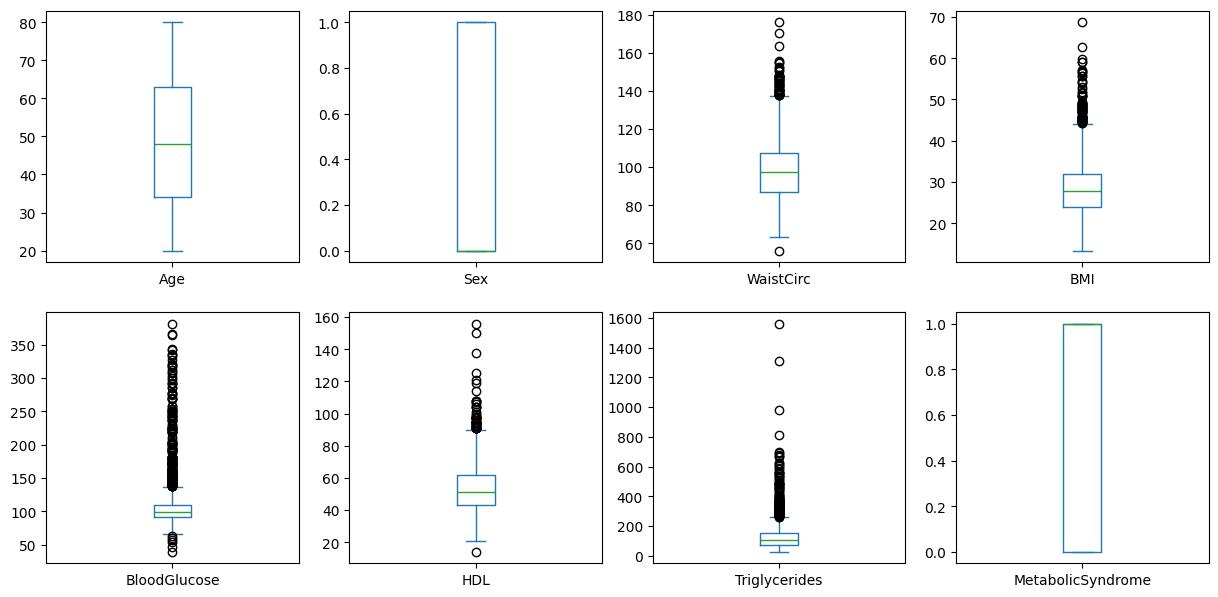

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 15))
plt.show()

In [ ]:
kolom_numerik = df.select_dtypes(include=['number'])

for column in kolom_numerik:
    # Hitung Q1 dan Q3
    quantiles = df[column].quantile([0.25, 0.75])
    q1, q3 = quantiles[0.25], quantiles[0.75]

    # Hitung IQR, lower bound, upper bound
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Menangani outlier dengan batas atas bawah
    df[column] = df[column].clip(lower_bound, upper_bound)

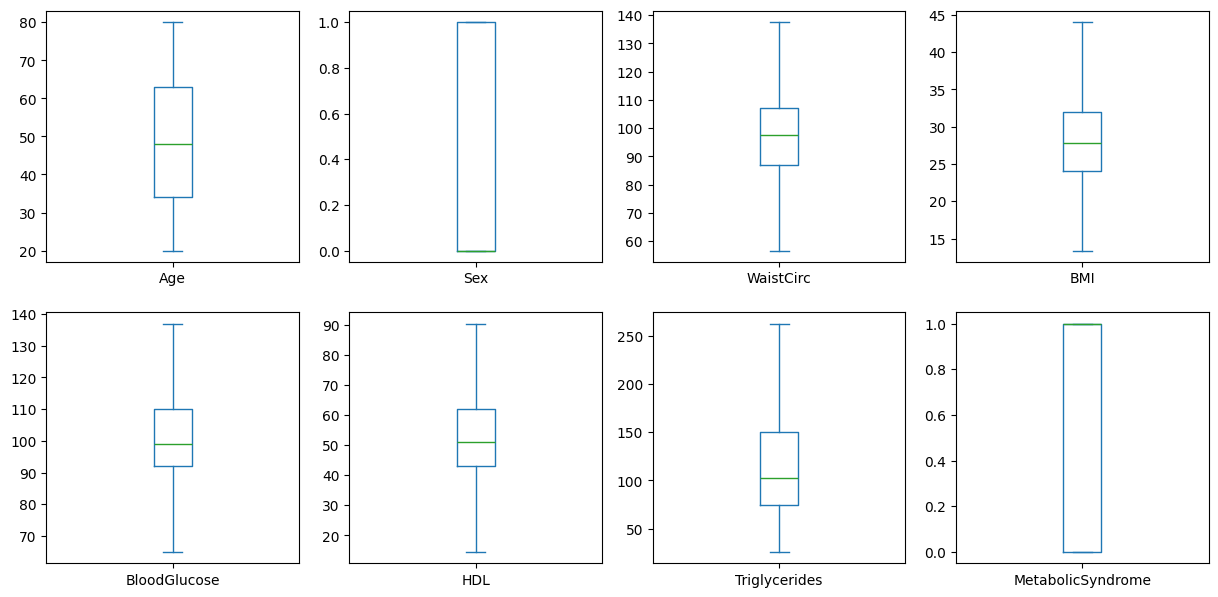

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 15))
plt.show()

**Menentukan fitur  X dan y**

In [ ]:
X = df.drop('MetabolicSyndrome', axis=1) # drop fitur MetabolicSyndrome
y = df['MetabolicSyndrome'] # Mengambil fitur MEtabolicSyndrome

In [ ]:
X

,Age,Sex,WaistCirc,BMI,BloodGlucose,HDL,Triglycerides
0,22,1,81.000000,23.3,92,41.0,84.0
1,44,0,80.100000,23.2,82,28.0,56.0
2,21,1,69.600000,20.1,107,43.0,78.0
3,43,0,120.400000,33.3,104,73.0,141.0
4,51,1,81.100000,20.1,95,43.0,126.0
...,...,...,...,...,...,...,...
2396,48,0,98.307254,44.0,137,57.0,107.0
2397,30,0,98.307254,18.0,91,90.0,91.0
2398,28,1,100.800000,29.4,99,47.0,84.0
2399,27,1,106.600000,31.3,100,41.0,124.0


In [ ]:
y

,MetabolicSyndrome
0,1
1,1
2,1
3,1
4,1
...,...
2396,1
2397,1
2398,1
2399,0


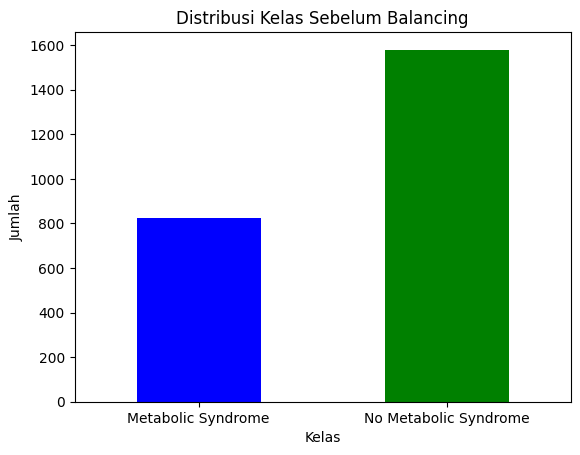

,count
MetabolicSyndrome,
1,1579
0,822


In [ ]:
# Melihat distribusi kelas sebelum balancing
y.value_counts().sort_index().plot(kind='bar', color= ['blue', 'green'])
plt.title('Distribusi Kelas Sebelum Balancing')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Metabolic Syndrome', 'No Metabolic Syndrome'], rotation=0)
plt.show()

y.value_counts()



> Kelas 0 = teriagnosa Sindrom Metabolik
Kelas 1 = tidak terdiagnosa Sindrom Metabolik



# BALANCING DATA

**SMOTE**

In [ ]:
# Terapkan SMOTE untuk balancing data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

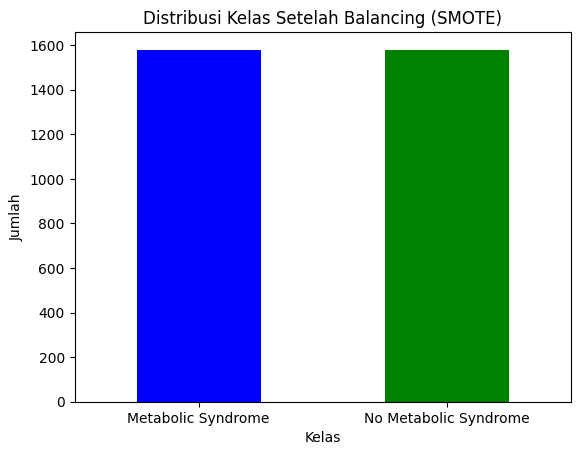

,count
MetabolicSyndrome,
1,1579
0,1579


In [ ]:
# Melihat distribusi kelassetelah balancing dengan SMOTE
y_smote.value_counts().sort_index().plot(kind='bar', color= ['blue', 'green'])
plt.title('Distribusi Kelas Setelah Balancing (SMOTE)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Metabolic Syndrome', 'No Metabolic Syndrome'], rotation=0)
plt.show()

y_smote.value_counts()

**ADASYN**

In [ ]:
# Terapkan ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

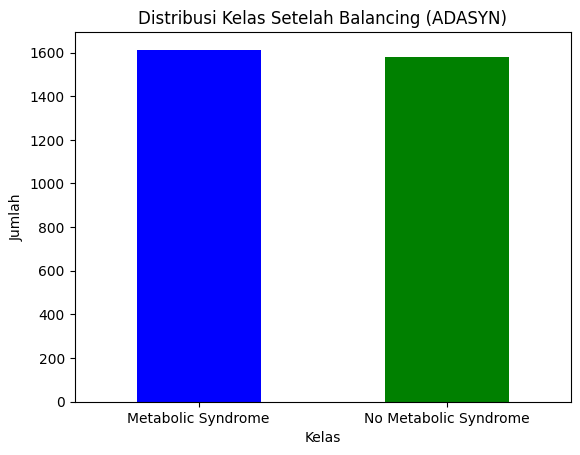

,count
MetabolicSyndrome,
0,1613
1,1579


In [ ]:
# Melihat distribusi kelassetelah balancing dengan ADASYN
y_resampled.value_counts().sort_index().plot(kind='bar', color= ['blue', 'green'])
plt.title('Distribusi Kelas Setelah Balancing (ADASYN)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Metabolic Syndrome', 'No Metabolic Syndrome'], rotation=0)
plt.show()

y_resampled.value_counts()

#MODELING RANDOM FOREST

**Tanpa Balancing**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih: {X_train.shape}, Ukuran Data Uji: {X_test.shape}")

Ukuran Data Latih: (1920, 7), Ukuran Data Uji: (481, 7)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Inisialisasi Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Pengujian
y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

# Tampilkan classification report untuk evaluasi lebih lanjut
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       157
           1       0.89      0.92      0.91       324

    accuracy                           0.87       481
   macro avg       0.86      0.85      0.85       481
weighted avg       0.87      0.87      0.87       481



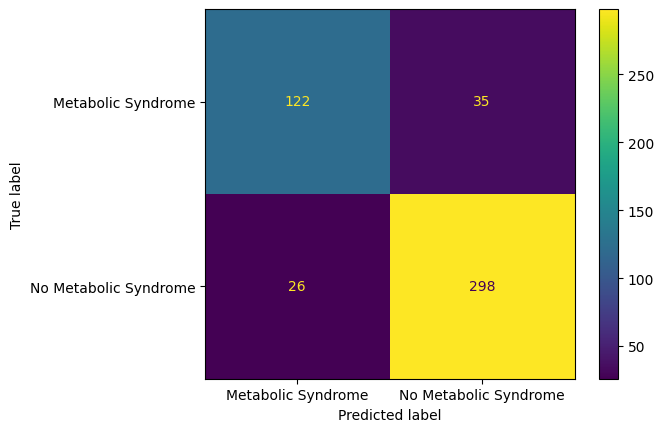

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Update display_labels to match the actual classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Metabolic Syndrome', 'No Metabolic Syndrome']) # Changed the labels here
disp.plot()
plt.show()

In [ ]:
print(f"{accuracy:.2f}")
print(f"{precision:.2f}")
print(f"{recall:.2f}")
print(f"{f1_score:.2f}")

0.87
0.87
0.87
0.87




> Tanpa balancing data akurasi model sebesar 87%, Presisi 87%, recall 87% dan F1 score 87%. Pada kelas mayoritas(1) recall 0.92 dan kelas minoritas(0) 0.78, menaandakan model masih kurang untuk mendeteksi kelas minoritas. Model masih kurang baik dalam memprediksi seseorang terkena metabolik sindrom(0)



**SMOTE**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih: {X_train.shape}, Ukuran Data Uji: {X_test.shape}")

Ukuran Data Latih: (2526, 7), Ukuran Data Uji: (632, 7)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Inisialisasi Random Forest Classifier
rf_model_smote = RandomForestClassifier(random_state=42)

# Melatih model
rf_model_smote.fit(X_train, y_train)

# Pengujian
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluasi model
accuracy2 = accuracy_score(y_test, y_pred_smote)
precision2 = precision_score(y_test, y_pred_smote, average='weighted')
recall2 = recall_score(y_test, y_pred_smote, average='weighted')
f1_score2 = f1_score(y_test, y_pred_smote, average='weighted')

# Tampilkan classification report untuk evaluasi lebih lanjut
print("Classification Report:")
print(classification_report(y_test, y_pred_smote))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       316
           1       0.93      0.87      0.90       316

    accuracy                           0.90       632
   macro avg       0.90      0.90      0.90       632
weighted avg       0.90      0.90      0.90       632



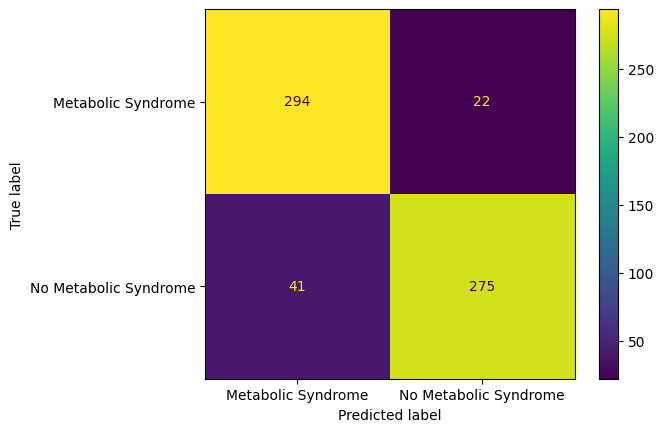

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Metabolic Syndrome', 'No Metabolic Syndrome']) # Changed the labels here
disp.plot()
plt.show()

In [ ]:
print(f"{accuracy2:.2f}")
print(f"{precision2:.2f}")
print(f"{recall2:.2f}")
print(f"{f1_score2:.2f}")

0.90
0.90
0.90
0.90




> Dengan balancing data (SMOTE) akurasi model naik menjadi sebesar 90%, Presisi 90%, recall 90% dan F1 score 90%. Pada kelas mayoritas(1) recall turun 0.87 dan kelas minoritas(0) naik menjadi 0.93, menaandakan model sudah lebih baik dalam mendeteksi kelas minoritas (memprediksi seseorang terkena metabolik sindrom(0))



**ADASYN**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih: {X_train.shape}, Ukuran Data Uji: {X_test.shape}")

Ukuran Data Latih: (2553, 7), Ukuran Data Uji: (639, 7)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Inisialisasi Random Forest Classifier
rf_model_adasyn = RandomForestClassifier(random_state=42)

# Melatih model
rf_model_adasyn.fit(X_train, y_train)

# Pengujian
y_pred_adaysn = rf_model_adasyn.predict(X_test)

# Evaluasi model
accuracy3 = accuracy_score(y_test, y_pred_adaysn)
precision3 = precision_score(y_test, y_pred_adaysn, average='weighted')
recall3 = recall_score(y_test, y_pred_adaysn, average='weighted')
f1_score3 = f1_score(y_test, y_pred_adaysn, average='weighted')

# Tampilkan classification report untuk evaluasi lebih lanjut
print("Classification Report:")
print(classification_report(y_test, y_pred_adaysn))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       316
           1       0.95      0.87      0.90       323

    accuracy                           0.91       639
   macro avg       0.91      0.91      0.91       639
weighted avg       0.91      0.91      0.91       639



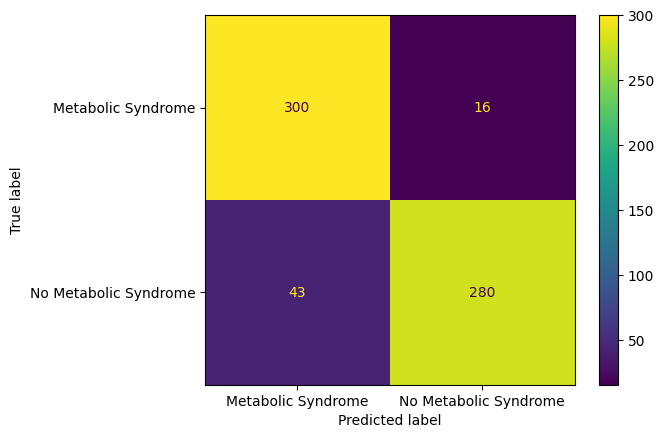

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_adaysn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Metabolic Syndrome', 'No Metabolic Syndrome']) # Changed the labels here
disp.plot()
plt.show()

In [ ]:
print(f"{accuracy3:.2f}")
print(f"{precision3:.2f}")
print(f"{recall3:.2f}")
print(f"{f1_score3:.2f}")

0.91
0.91
0.91
0.91




> Dengan balancing data (ADASYN) akurasi model naik menjadi sebesar 91%, Presisi 91%, recall 91% dan F1 score 91%. Pada kelas mayoritas(1) recall 0.87 dan kelas minoritas(0) naik menjadi 0.95, menaandakan model sudah lebih baik dibanddingkan dengan SMOTE dalam mendeteksi kelas minoritas (memprediksi seseorang terkena metabolik sindrom(0))



Memvisualisasikan perbadingan kaurasi model menggunakan diagram batang

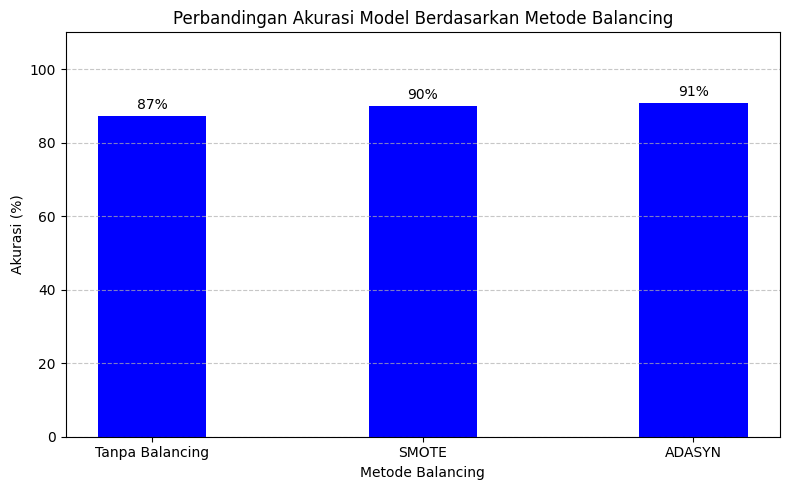

In [ ]:
model = ['Tanpa Balancing', 'SMOTE', 'ADASYN']
akurasi_persen = [a * 100 for a in [accuracy, accuracy2, accuracy3]]

x = np.arange(len(model))
plt.figure(figsize=(8, 5))
bars = plt.bar(x, akurasi_persen, width=0.4, color='blue')

# Label persen
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{bar.get_height():.0f}%',
             ha='center', va='bottom', fontsize=10)

# Tampilan
plt.xticks(x, model)
plt.xlabel('Metode Balancing')
plt.ylabel('Akurasi (%)')
plt.title('Perbandingan Akurasi Model Berdasarkan Metode Balancing')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# KESIMPULAN

> Balancing sangat membantu memperbaiki performa model terhadap kelas minoritas.


> ADASYN memberikan performa terbaik, karena:
- Akurasi lebih tinggi, 91%
- Recall kelas minoritas paling tinggi.
- F1-score secara keseluruhan juga tertinggi 91%.
- Penurunan recall pada kelas mayoritas wajar dan tidak ekstrem, serta diimbangi dengan peningkatan presisi.




# UJI COBA INPUTAN


Menurut National Heart, Lung, and Blood Institue seseorang di diagnosa Sindrom metabolik ketika memiliki 3 atau lebih dari kriteria berikut:

| Komponen                  | Kriteria Diagnosis                     |
| ------------------------- | -------------------------------------- |
| **Tekanan darah**         | ≥130/85 mmHg                           |
| **Gula darah puasa (Fasting Glucose)**      | ≥100 mg/dL                             |
| **Kolesterol HDL (baik)** | <40 mg/dL (pria)<br><50 mg/dL (wanita) |
| **Trigliserida**          | >150 mg/dL                             |
| **Lingkar pinggang**      | >102 cm (pria)<br>>89 cm (wanita)      |

In [ ]:
# hasil uji pria ada 4 kriteria metsyn
input = np.array([[22,	1,	120,	17.5,	110,	56.0,	160]])  # Age, Sex[wanita, pria],	WaistCirc,	BMI,	BloodGlucose,	HDL,	Triglycerides

prediction = rf_model_adasyn.predict(input)

if prediction[0] == 0:
    print("Hasil Prediksi: Met (Positif Sindrom Metabolik)")
else:
    print("Hasil Prediksi: No Met (Negatif Sindrom Metabolik)")

Hasil Prediksi: Met (Positif Sindrom Metabolik)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# hasil uji wanita ada 4 kriteria metsyn
input = np.array([[22,	0,	120,	23.3,	110,	56.0,	160]])  # Age, Sex[wanita, pria],	WaistCirc,	BMI,	BloodGlucose,	HDL,	Triglycerides

prediction = rf_model_adasyn.predict(input)

if prediction[0] == 0:
    print("Hasil Prediksi: Met (Positif Sindrom Metabolik)")
else:
    print("Hasil Prediksi: No Met (Negatif Sindrom Metabolik)")

Hasil Prediksi: Met (Positif Sindrom Metabolik)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# hasil uji wanita ada 2 kriteria metsyn
input = np.array([[39,1,92.4,23.0,133,42.0,98.0]])  # Age, Sex[wanita, pria],	WaistCirc,	BMI,	BloodGlucose,	HDL,	Triglycerides

prediction = rf_model_adasyn.predict(input)

if prediction[0] == 0:
    print("Hasil Prediksi: Met (Positif Sindrom Metabolik)")
else:
    print("Hasil Prediksi: No Met (Negatif Sindrom Metabolik)")

Hasil Prediksi: No Met (Negatif Sindrom Metabolik)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Download model adasyn

In [ ]:
import joblib

joblib.dump(rf_model_adasyn, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
model = joblib.load('rf_model.pkl')
print(model.predict([[25, 1, 80, 23.5, 100, 45, 150]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
comparison_df = X_test.copy()
comparison_df["Actual"] = y_test.values if hasattr(y_test, "values") else y_test
comparison_df["Predicted"] = y_pred_adaysn

# 5. Tampilkan beberapa baris sebagai sampel
print("\nPerbandingan Data Asli dan Prediksi:")
print(comparison_df.head(10))


Perbandingan Data Asli dan Prediksi:
      Age  Sex  WaistCirc   BMI  BloodGlucose   HDL  Triglycerides  Actual  \
1029   39    1       92.4  23.0           133  42.0           98.0       1   
1001   25    0       83.2  23.3            86  67.0          127.0       1   
785    42    0       95.4  28.9           102  66.0           55.0       1   
411    80    1       89.4  23.8           107  31.0           99.0       1   
1105   46    0      122.5  35.5            99  46.0          114.0       1   
612    21    1      101.6  30.6            95  39.0           73.0       0   
610    38    1      104.0  26.9            90  44.0          193.0       0   
2268   36    0      112.4  40.8            95  34.0          156.0       0   
134    29    0      101.8  29.9           105  64.0          115.0       1   
1842   23    0      116.5  38.5            98  40.0           77.0       1   

      Predicted  
1029          1  
1001          1  
785           1  
411           0  
1105         